<a href="https://colab.research.google.com/github/ragucreation/Contact-ui/blob/main/house_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [4]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [5]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

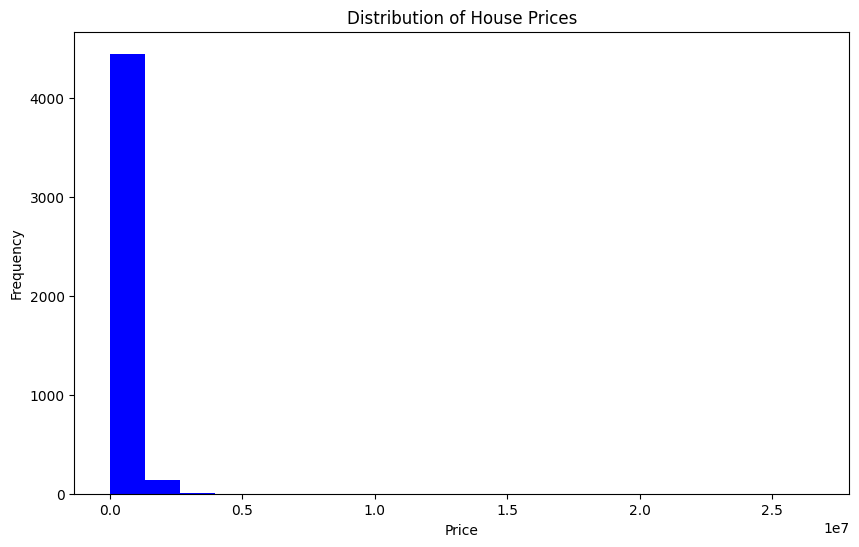

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=20, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


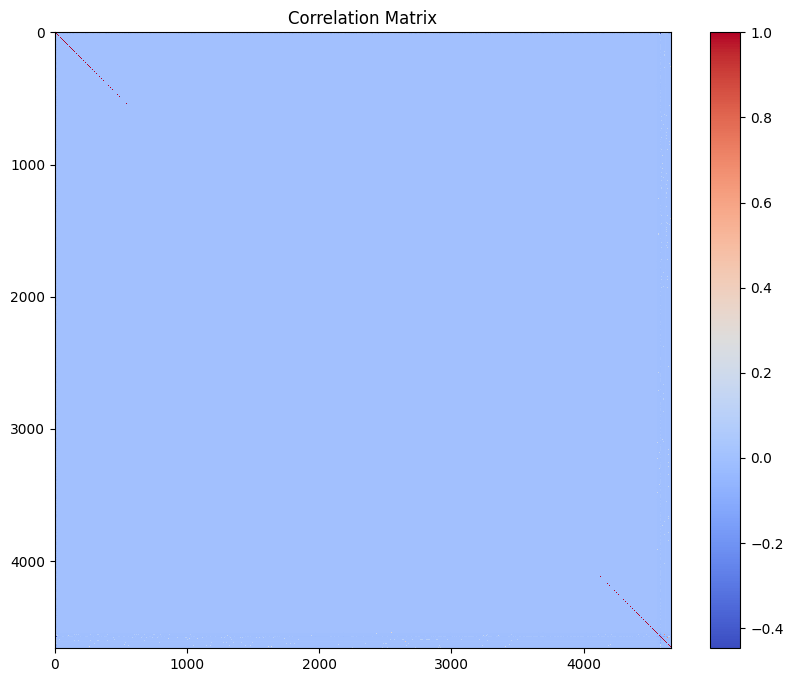

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Check data types of columns
print(df.dtypes)

# Drop the 'date' column as it contains non-numeric data
df = df.drop('date', axis=1)

# Convert categorical variables to numerical using one-hot encoding
# Use actual categorical column names from the dataset
df = pd.get_dummies(df, columns=['street', 'city', 'statezip', 'country'])

# Compute the correlation matrix
corr = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()


In [25]:
df.dropna(inplace=True)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


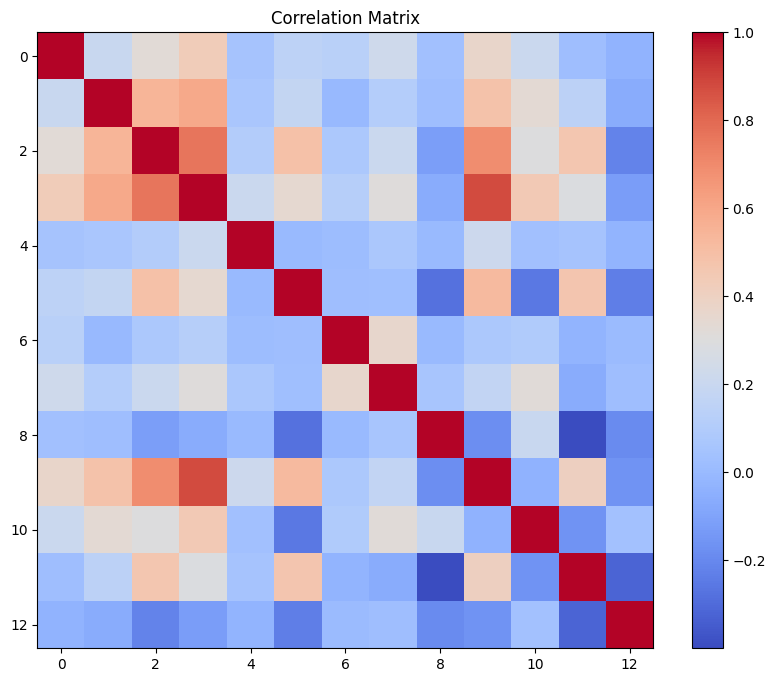

In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Print the actual columns in the DataFrame
print(df.columns)

# Drop the 'date' column
df = df.drop('date', axis=1)

# Convert categorical variables to numerical using one-hot encoding
# Use the actual categorical column names: 'street', 'city', 'statezip', 'country'
df = pd.get_dummies(df, columns=['street', 'city', 'statezip', 'country'])

# Ensure all columns are numerical
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()


In [30]:
X = df.drop('price', axis=1)
y = df['price']

In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
  y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 4583391756079.60
R-squared Score: -3.49


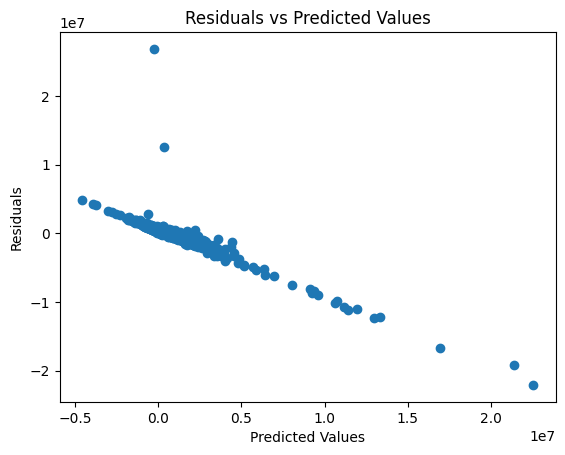

In [37]:
      residuals = y_test - y_pred
      plt.scatter(y_pred, residuals)
      plt.title('Residuals vs Predicted Values')
      plt.xlabel('Predicted Values')
      plt.ylabel('Residuals')
      plt.show()

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data.csv')

# Prepare features and target
X = df.drop('price', axis=1)  # Assuming 'price' is your target variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data types of training features and target
print("X_train data types:")
print(X_train.dtypes)
print("\ny_train data type:")
print(y_train.dtype)

# Handle categorical variables
# Replace 'street', 'city', 'statezip', 'country' with your actual categorical columns
categorical_columns = ['street', 'city', 'statezip', 'country']
X_train = pd.get_dummies(X_train, columns=categorical_columns)

# Ensure all columns are numerical
X_train = X_train.select_dtypes(include=['int64', 'float64'])

# Check for missing values
print("\nMissing values in X_train:")
print(X_train.isnull().sum())
print("\nMissing values in y_train:")
print(y_train.isnull().sum())

# Drop rows with missing values
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

# Add a constant (intercept term) to the training features
X_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_sm).fit()

# Print the model summary
print("\nModel Summary:")
print(model_sm.summary())


X_train data types:
date              object
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

y_train data type:
float64

Missing values in X_train:
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

Missing values in y_train:
0

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   

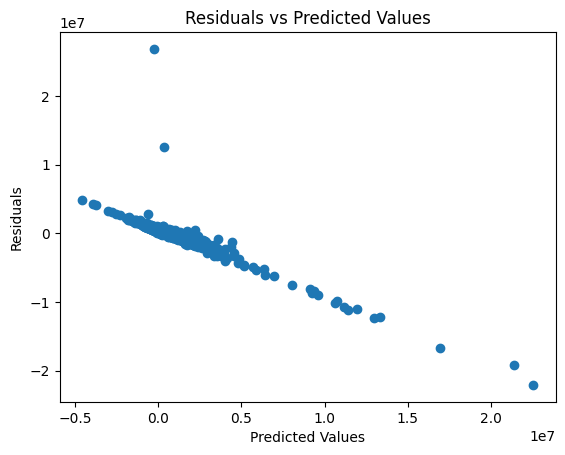

In [42]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [44]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
print(f"Best Alpha: {lasso.alpha_}")

Best Alpha: 1029018.1045433092
